# Refining Dimensionality Reduction with DynamicViz for Unbiased Insights

**Author:** Shingo Nakazawa([@shnakazawa](https://twitter.com/shnakazawa))

**Objective:** In this notebook, I would like to introduce how to use DynamicViz developed by [Sun et al., 2023](https://www.nature.com/articles/s43588-022-00380-4)

DynamicViz is a practical framework that enhances dimensionality reduction techniques like t-SNE and UMAP. By employing a bootstrap method, it offers quantitative metrics for model selection and hyperparameter tuning, while reducing subjectivity in interpretation.

For Japanese readers, [a related article is available here](https://zenn.dev/aidemy/articles/11f3c0deef923c)

## Dataset

This notebook uses the same dataset as [the previous notebook](Beyond_Unsupervised_Clustering.ipynb).

Data on "2022 Team Pitching" for 12 teams were obtained from [Baseball Reference](https://www.baseball-reference.com/).
- [6 teams from Japan Central League](https://www.baseball-reference.com/register/league.cgi?code=JPCL&class=Fgn)
- [6 teams from Japan Pacific League](https://www.baseball-reference.com/register/league.cgi?code=JPPL&class=Fgn)

CSV files were saved and placed in the `data` folder as shown below.

```zsh
.
├── This notebook
└── data/
    ├── ChibaLotteMarines.csv
    ├── ChunichiDragons.csv
    ├── FukuokaSoftbankHawks.csv
    ├── HanshinTigers.csv
    ├── HiroshimaCarp.csv
    ├── HokkaidoNipponHamFighters.csv
    ├── OrixBuffaloes.csv
    ├── SaitamaSeibuLions.csv
    ├── TohokuRakutenGoldenEagles.csv
    ├── YakultSwallows.csv
    ├── YokohamaBayStars.csv
    └── YomiuriGiants.csv
```

## Preprocessing and clustering

The same preprocessing and clustering steps are applied as in [the previous notebook](Beyond_Unsupervised_Clustering.ipynb). (Thus, please refer to the previous notebook for detailed information.)

In [1]:
import pandas as pd
from pathlib import Path
from sklearn import preprocessing

teams = Path('data').rglob('*.csv')
for i, team in enumerate(teams):
    if i == 0:
        df = pd.read_csv(team)
        df['Team'] = team.stem
    else:
        df_tmp = pd.read_csv(team)
        df_tmp['Team'] = team.stem
        df = pd.concat([df, df_tmp], axis = 0)
df_tmp = df[df['Name'] != 'Sho Iwasaki']
df_dropped = df_tmp.drop(['Rk','W-L%', 'GS', 'GF', 'SO/W', 'Notes', 'Name-additional'], axis=1)
df_features = df_dropped.drop(['Name', 'Team'], axis=1)
mm = preprocessing.MinMaxScaler()
df_features_mm = pd.DataFrame(mm.fit_transform(df_features), columns=df_features.columns)
df_features_mm

,Age,W,L,ERA,G,CG,SHO,SV,IP,H,...,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9
0,0.44,0.066667,0.000000,0.018074,0.614286,0.0,0.0,0.076923,0.227178,0.112821,...,0.204878,0.181818,0.0,0.00,0.214192,0.121167,0.100000,0.022222,0.148148,0.477778
1,0.16,0.066667,0.000000,0.143704,0.042857,0.0,0.0,0.000000,0.066390,0.087179,...,0.034146,0.090909,0.0,0.00,0.074901,0.282000,0.262222,0.077778,0.259259,0.266667
2,0.48,0.266667,0.416667,0.119111,0.485714,0.0,0.0,0.000000,0.206950,0.184615,...,0.219512,0.636364,0.0,0.25,0.237845,0.231333,0.177778,0.100000,0.333333,0.555556
3,0.40,0.000000,0.000000,0.070519,0.200000,0.0,0.0,0.000000,0.114108,0.117949,...,0.097561,0.181818,0.0,0.00,0.128778,0.242667,0.202222,0.000000,0.296296,0.438889
4,0.84,0.333333,0.000000,0.074963,0.414286,0.0,0.0,0.025641,0.108402,0.102564,...,0.117073,0.181818,0.0,0.00,0.107753,0.171833,0.186667,0.044444,0.059259,0.561111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0.40,0.000000,0.166667,0.290963,0.114286,0.0,0.0,0.000000,0.035788,0.046154,...,0.039024,0.090909,0.0,0.00,0.047306,0.386333,0.244444,0.411111,0.725926,0.544444
349,0.64,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.009336,0.000000,...,0.019512,0.000000,0.0,0.00,0.006570,0.166667,0.000000,0.000000,0.666667,1.000000
350,0.24,0.000000,0.000000,0.000000,0.014286,0.0,0.0,0.000000,0.009336,0.010256,...,0.000000,0.000000,0.0,0.00,0.009198,0.250000,0.200000,0.000000,0.333333,0.000000
351,0.20,0.333333,0.416667,0.093037,0.271429,0.0,0.0,0.000000,0.502593,0.487179,...,0.268293,0.818182,0.0,0.00,0.534823,0.197000,0.195556,0.066667,0.133333,0.283333


In [2]:
from sklearn.cluster import KMeans

k = 8 # num of clusters
kmeanModel = KMeans(n_clusters=k, random_state=42)
kmeanModel.fit(df_features_mm)
clusters = kmeanModel.labels_

clusters

array([6, 7, 6, 5, 5, 1, 6, 7, 5, 5, 7, 2, 7, 6, 7, 7, 7, 7, 4, 5, 7, 5,
       7, 3, 7, 2, 4, 4, 5, 7, 7, 3, 6, 7, 4, 6, 0, 2, 6, 6, 3, 0, 3, 5,
       3, 5, 5, 7, 5, 7, 7, 4, 7, 4, 7, 3, 7, 6, 1, 7, 6, 7, 6, 5, 7, 6,
       2, 7, 7, 2, 5, 7, 6, 7, 0, 5, 5, 7, 7, 3, 5, 3, 5, 3, 5, 6, 5, 7,
       7, 0, 3, 4, 3, 5, 4, 7, 7, 3, 6, 7, 6, 6, 3, 5, 1, 7, 4, 6, 7, 7,
       0, 0, 6, 4, 7, 7, 6, 2, 4, 7, 6, 7, 7, 7, 3, 7, 4, 0, 5, 5, 7, 6,
       7, 0, 4, 1, 7, 6, 7, 2, 6, 6, 5, 7, 2, 5, 5, 4, 6, 5, 6, 7, 3, 6,
       4, 4, 5, 5, 5, 6, 6, 6, 1, 5, 0, 7, 7, 2, 7, 4, 4, 5, 3, 0, 5, 7,
       0, 7, 6, 3, 4, 3, 6, 3, 7, 1, 4, 6, 6, 6, 0, 0, 6, 3, 5, 3, 6, 5,
       4, 7, 5, 7, 0, 4, 6, 6, 5, 7, 0, 5, 3, 1, 3, 5, 5, 4, 2, 7, 7, 6,
       7, 6, 6, 7, 5, 4, 6, 7, 5, 5, 4, 6, 5, 5, 7, 7, 7, 4, 5, 7, 3, 4,
       0, 7, 1, 5, 7, 5, 6, 4, 5, 6, 6, 7, 0, 3, 4, 7, 7, 3, 5, 7, 7, 7,
       0, 3, 6, 6, 4, 5, 7, 7, 7, 1, 4, 0, 3, 5, 6, 4, 6, 5, 5, 4, 7, 5,
       2, 3, 0, 5, 0, 6, 5, 0, 7, 5, 2, 5, 3, 3, 6,

## Basic usage

First, let's review the basic usage of DynamicViz by referring to [the original tutorial.ipynb](https://github.com/sunericd/dynamicviz/blob/main/tutorial.ipynb).

### Importing modules and transforming data

In [3]:
from dynamicviz import boot, viz, score

X = df_features_mm.to_numpy()
y = pd.DataFrame(clusters, columns=['Cluster'])

/Users/p160/miniforge3/envs/dynamicviz/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/p160/miniforge3/envs/dynamicviz/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/p160/miniforge3/envs/dynamicviz/lib/python3.8/site-packag

### Bootstram sampling

In [4]:
out = boot.generate(
    X, # data. numpy.ndarray
    Y=y, # group label
    method='umap', # Dimensionality reduction method
    B=4, # num of bootstrap
    random_seed=452, random_state=452 # random seed
)
out

100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


,x1,x2,original_index,bootstrap_number,Cluster
0,0.263548,-2.230592,0,-1,6
1,2.643951,-0.467579,1,-1,7
2,-1.307542,-2.049886,2,-1,6
3,1.187174,0.808326,3,-1,5
4,0.254412,-0.996797,4,-1,5
...,...,...,...,...,...
348,3.648727,2.311553,88,3,7
349,5.058800,1.126019,87,3,7
350,-1.490053,-4.260623,338,3,1
351,4.252829,1.020082,105,3,7


### Static visualization

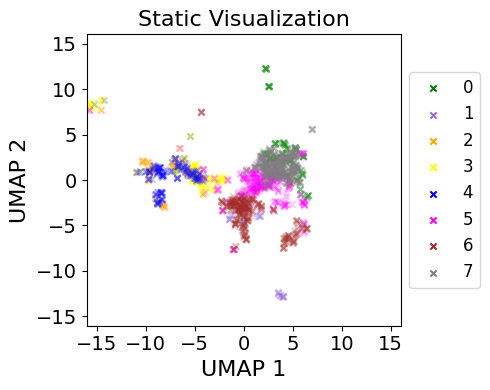

In [5]:
fig = viz.stacked(
    out, # Bootstrapped data
    'Cluster', # Column name of group label
    show=True, # Show figure
    save='StaticViz.png', # Save path
    # Plot arguments
    alpha=0.2, title='Static Visualization', width=5, height=4,
    xlabel='UMAP 1', ylabel='UMAP 2', dpi=150, marker='x', s=20, 
    show_legend=True, solid_legend=True, legend_fontsize=12,
    colors=['green','mediumpurple','orange','yellow','blue','magenta','brown','gray']
)

### Calculating variance scores

The Variance Score is considered a measure of the stability of clusters and serves as **a quantitative metric to determine which dimensionality reduction technique is optimal**.

Setting up neighborhoods...
--- 0.002783060073852539 seconds ---
Populating distances...
--- 2.627462863922119 seconds ---
Computing mean pairwise distance for normalization...
--- 1.344480037689209 seconds ---
Computing variance scores...
--- 2.820491075515747 seconds ---
Global variance scores  0.16509836552358642


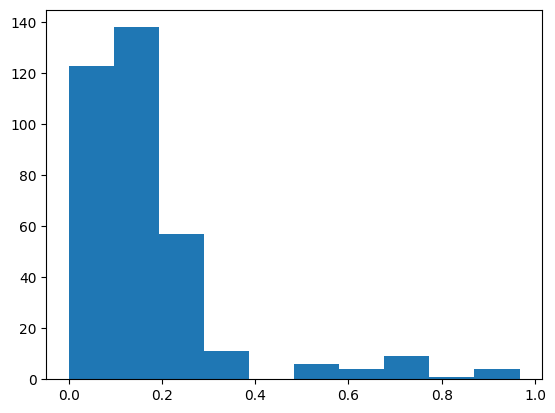

In [6]:
import matplotlib.pyplot as plt

variance_scores = score.variance(
    out, # Bootstrap data
    method='global' # Variance score method
)
# Print the average of global variance scores
print('Global variance scores ', variance_scores.mean()) 
# Visualize the distribution of global variance scores
plt.hist(variance_scores)
plt.show()

#### Approx. global variance score

Setting up neighborhoods...
--- 0.004102230072021484 seconds ---
Populating distances...
--- 0.47559070587158203 seconds ---
Computing mean pairwise distance for normalization...
--- 0.17923188209533691 seconds ---
Computing variance scores...
--- 0.39850306510925293 seconds ---


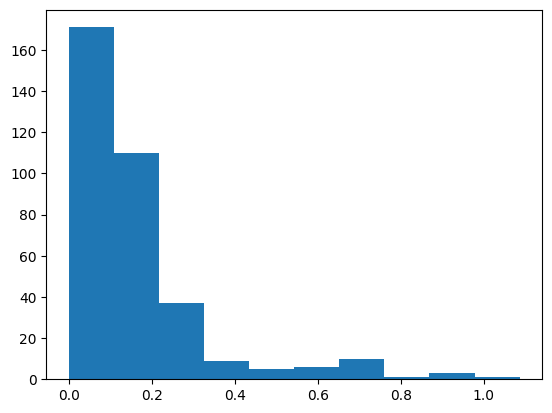

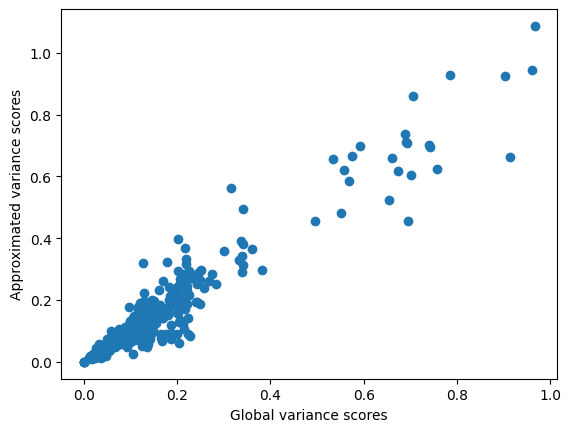

0.9118821829320426


In [7]:
from scipy.stats import spearmanr

variance_scores_random = score.variance(out, method="random", k=50)

hist = plt.hist(variance_scores_random)
plt.show()

plt.scatter(variance_scores, variance_scores_random)
plt.xlabel("Global variance scores")
plt.ylabel("Approximated variance scores")
plt.show()

r,p = spearmanr(variance_scores, variance_scores_random)
print(r)

## Practical use

Now, let's put DynamicViz into practical use. Let's search for the optimal dimensionality reduction technique and its hyperparameters for the baseball data.


### Determining the optimal dimensionality reduction technique

First, which technique is most suitable is explored. DynamicViz supports six methods: `t-SNE`, `MDS`, `LLE`, `MLLE`, `Isomap`, and `UMAP`. 

We will compare the Global Variance Score using the default settings for each method.

====tsne====


100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


Setting up neighborhoods...
--- 0.0028259754180908203 seconds ---
Populating distances...
--- 10.81027889251709 seconds ---
Computing mean pairwise distance for normalization...
--- 1.3950481414794922 seconds ---
Computing variance scores...
--- 2.810961961746216 seconds ---
====mds====


100%|██████████| 20/20 [00:16<00:00,  1.18it/s]


Setting up neighborhoods...
--- 0.0040130615234375 seconds ---
Populating distances...
--- 10.873079061508179 seconds ---
Computing mean pairwise distance for normalization...
--- 1.4007201194763184 seconds ---
Computing variance scores...
--- 2.83428692817688 seconds ---
====lle====


100%|██████████| 20/20 [00:00<00:00, 71.05it/s]


Setting up neighborhoods...
--- 0.004045724868774414 seconds ---
Populating distances...
--- 10.78757119178772 seconds ---
Computing mean pairwise distance for normalization...
--- 1.4018712043762207 seconds ---
Computing variance scores...
--- 2.826366901397705 seconds ---
====mlle====


100%|██████████| 20/20 [00:01<00:00, 12.34it/s]


Setting up neighborhoods...
--- 0.0029060840606689453 seconds ---
Populating distances...
--- 10.746465921401978 seconds ---
Computing mean pairwise distance for normalization...
--- 1.4001109600067139 seconds ---
Computing variance scores...
--- 2.818506956100464 seconds ---
====isomap====


100%|██████████| 20/20 [00:00<00:00, 26.04it/s]


Setting up neighborhoods...
--- 0.008326053619384766 seconds ---
Populating distances...
--- 10.905207872390747 seconds ---
Computing mean pairwise distance for normalization...
--- 1.3848559856414795 seconds ---
Computing variance scores...
--- 2.8527040481567383 seconds ---
====umap====


100%|██████████| 20/20 [00:12<00:00,  1.62it/s]


Setting up neighborhoods...
--- 0.002681255340576172 seconds ---
Populating distances...
--- 10.833899974822998 seconds ---
Computing mean pairwise distance for normalization...
--- 1.42765212059021 seconds ---
Computing variance scores...
--- 2.864198923110962 seconds ---


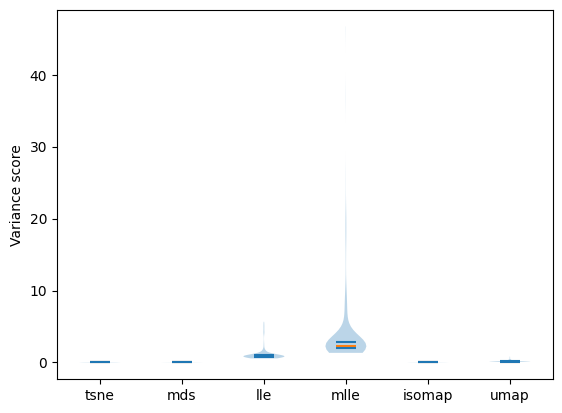

In [8]:
methods = ['tsne', 'mds', 'lle', 'mlle', 'isomap', 'umap']
scores = []

for method in methods:
    print(f'===={method}====')
    if method == 'mlle': # For MLLE, eigen_solver must be set.
        out = boot.generate(X, Y=y, method=method, B=20, random_seed=452, random_state=452, eigen_solver="dense")
    elif method == 'isomap': # random_state does not exist in isomap
        out = boot.generate(X, Y=y, method=method, B=20, random_seed=452)
    else:
        out = boot.generate(X, Y=y, method=method, B=20, random_seed=452, random_state=452)
    variance_scores = score.variance(out, method='global')
    scores.append(variance_scores)

# Show variance scores by violin plot
fig=plt.violinplot(scores, showmedians=True, showextrema=False, quantiles= [[0.25, 0.75]]*len(methods))
plt.xticks(range(1, len(methods)+1), methods)
plt.ylabel('Variance score')
fig['cmedians'].set_color('C1')
plt.show()

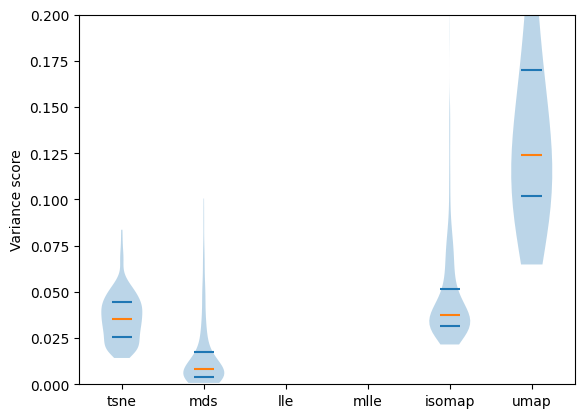

In [9]:
# Show variance scores by violin plot (zoomed in)
fig=plt.violinplot(scores, showmedians=True, showextrema=False, quantiles= [[0.25, 0.75]]*len(methods))
plt.ylim(0, 0.2)
plt.xticks(range(1, len(methods)+1), methods)
plt.ylabel('Variance score')
fig['cmedians'].set_color('C1')
plt.show()

Here, the median is marked in orange, and the 25th and 75th percentiles are indicated with blue lines. 

Since a lower Variance Score indicates a better score, **MDS is considered to be the most suitable** for this data set (when using the global variance score as the metric).

### Determining the optimal hyperparameters

Next, let's tune hyperparameters for MDS. This will also be compared using the global variance score. 

For simplicity, only the `max_iter` parameter is searched here.

==== max_iter:50 ====


100%|██████████| 20/20 [00:04<00:00,  4.63it/s]


Setting up neighborhoods...
--- 0.005840778350830078 seconds ---
Populating distances...
--- 10.801303148269653 seconds ---
Computing mean pairwise distance for normalization...
--- 1.397017002105713 seconds ---
Computing variance scores...
--- 2.819981813430786 seconds ---
==== max_iter:150 ====


100%|██████████| 20/20 [00:11<00:00,  1.74it/s]


Setting up neighborhoods...
--- 0.007592916488647461 seconds ---
Populating distances...
--- 10.934995889663696 seconds ---
Computing mean pairwise distance for normalization...
--- 1.4031779766082764 seconds ---
Computing variance scores...
--- 2.834386110305786 seconds ---
==== max_iter:300 ====


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


Setting up neighborhoods...
--- 0.0049550533294677734 seconds ---
Populating distances...
--- 10.989759922027588 seconds ---
Computing mean pairwise distance for normalization...
--- 1.413025140762329 seconds ---
Computing variance scores...
--- 2.8572871685028076 seconds ---
==== max_iter:500 ====


100%|██████████| 20/20 [00:16<00:00,  1.18it/s]


Setting up neighborhoods...
--- 0.0040569305419921875 seconds ---
Populating distances...
--- 11.041676044464111 seconds ---
Computing mean pairwise distance for normalization...
--- 1.4564790725708008 seconds ---
Computing variance scores...
--- 2.8997080326080322 seconds ---
==== max_iter:1000 ====


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


Setting up neighborhoods...
--- 0.011705875396728516 seconds ---
Populating distances...
--- 10.991089820861816 seconds ---
Computing mean pairwise distance for normalization...
--- 1.4497990608215332 seconds ---
Computing variance scores...
--- 2.9391558170318604 seconds ---


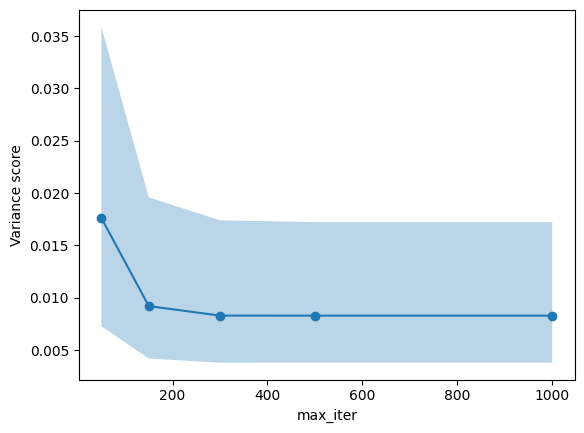

In [10]:
params = [50,150,300,500,1000]
scores = []

for param in params:
    print(f'==== max_iter:{param} ====')
    out = boot.generate(X, Y=y, method='mds', B=20, random_seed=452, random_state=452, max_iter=param)
    variance_scores = score.variance(out, method='global')
    scores.append(variance_scores)

# Show median, 25% quantile and 75% quantile of variance scores 
import numpy as np
plt.plot(params, [np.median(x) for x in scores], marker='o')
plt.fill_between(params, [np.quantile(x, 0.25) for x in scores], [np.quantile(x, 0.75) for x in scores], alpha=0.3)
plt.xlabel('max_iter')
plt.ylabel('Variance score')
plt.show()

Based on the above, we can conclude that a **`max_iter` of 300 is sufficient to achieve the best score** (within the scope of this coarse exploration).

### Interpreting the results with static visualization

Finally, we will create a static visualization using the selected method and hyperparameters.

100%|██████████| 20/20 [00:18<00:00,  1.08it/s]


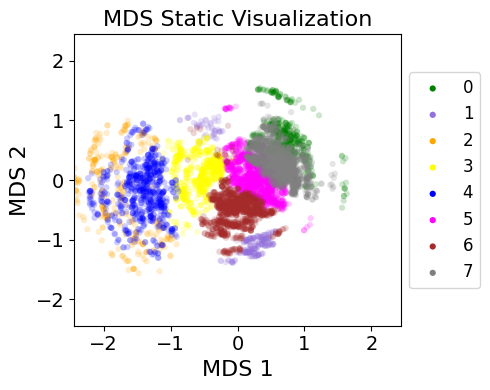

In [11]:
out = boot.generate(X, Y=y, method='mds', B=20, save=f'bootstrap_mds_optimized.csv', random_seed=452, random_state=452, max_iter=300)
fig = viz.stacked(
    out, # Bootstrapped data
    'Cluster', # Column name of group label
    show=True, # Show figure
    save='StaticViz.png', # Save path
    # Plot arguments
    alpha=0.2, title='MDS Static Visualization', width=5, height=4,
    xlabel='MDS 1', ylabel='MDS 2', dpi=150, marker='o', s=20, show_legend=True, solid_legend=True, legend_fontsize=12,
    colors=['green','mediumpurple','orange','yellow','blue','magenta','brown','gray']
)

Compared to [the previous analysis](Beyond_Unsupervised_Clustering.ipynb), it appears that:

- The overall positional relationship is maintained.
    - The continuous changes in pitching performance are well represented.
    - Performing pseudo-time analysis, as introduced in  [the previous notebook](Beyond_Unsupervised_Clustering.ipynb) seems feasible.
- The cloud of starters and that of relievers has connected.
    - This reflects the continuous changes in pitching performance.
    - Since there are pitchers who both start and relieve, this appears to reflect the real world more accurately.
- The closer cloud (purple: 1) divides into two distinct groups.
    - This suggests the potential for a deeper exploration of two subtypes within the closer category.
    - The use of k-means clustering might be less appropriate for classifying this data.

## Conclusion

In summary, the use of the DynamicViz framework in this analysis has demonstrated its utility in providing a **quantitative** approach to **selecting dimensionality reduction techniques and fine-tuning hyperparameters**. This framework offers a structured way to navigate through various methodological options, contributing to more informed decision-making in the analytical process.

I would like to extend my gratitude to the authors of [the original paper](https://www.nature.com/articles/s43588-022-00380-4) for developing such a useful and user-friendly tool. Their work in creating DynamicViz has significantly contributed to simplifying complex analytical tasks and has provided a clear pathway to better understand and visualize our data.

DynamicViz represents a significant step in the evolution of data visualization tools, offering both robustness and accessibility. Its application in this analysis underlines its potential as a valuable asset in the toolkit of data professionals aiming to uncover deeper insights from their data.